D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

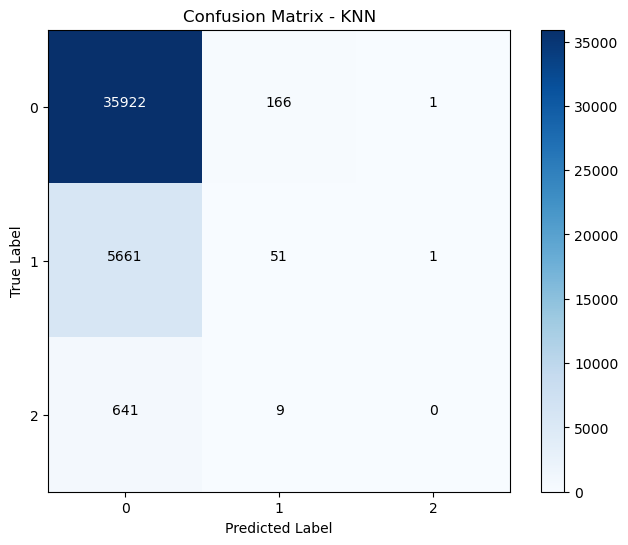

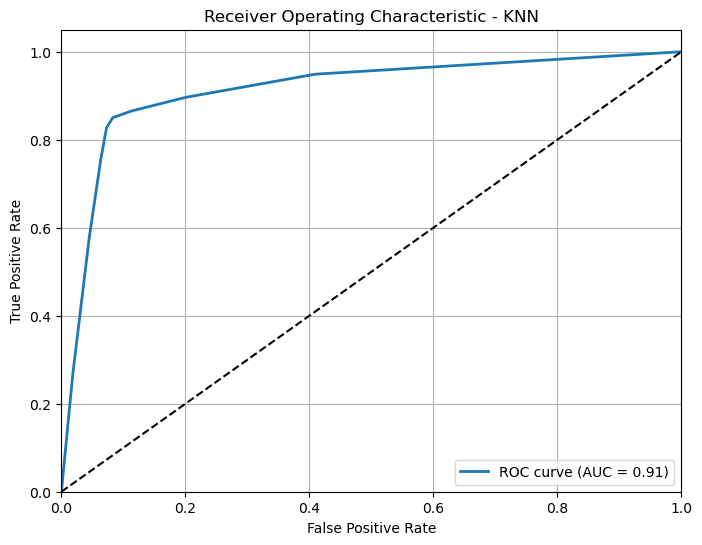

Accuracy: 0.8473805709978328
Best Parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 8, 'algorithm': 'brute'}


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]

y = dataset['accident_severity']  # Replace 'target_variable' with the name of your target column

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the parameter grid for random search
param_grid = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
}

# Step 5: Perform random search grid CV
knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=5, cv=2)
random_search.fit(X_train, y_train)

# Step 6: Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Step 7: Make predictions on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

# Step 8: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 9: Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 10: Binarize the target variable for ROC curve
y_bin = label_binarize(y_test, classes=np.unique(y))

# Step 11: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_bin.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

# Step 12: Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add the actual numbers inside the confusion matrix
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.show()

# Step 13: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc), lw=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 14: Print the accuracy
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)


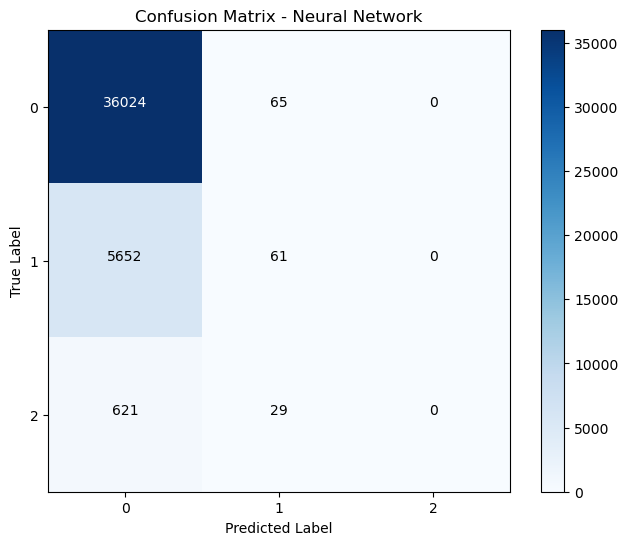

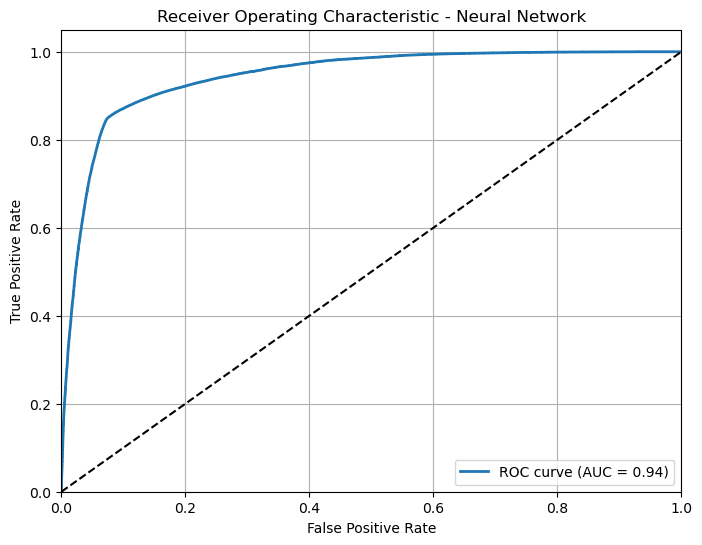

Accuracy: 0.8500188448129652
Best Parameters: {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'constant', 'hidden_layer_sizes': (10,), 'alpha': 0.01, 'activation': 'logistic'}


In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the parameter grid for random search
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,)],
    'activation': ['logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 500, 1000],
}


# Step 6: Perform random search grid CV
mlp = MLPClassifier(random_state=42)
random_search = RandomizedSearchCV(mlp, param_grid, n_iter=5, cv=2)
random_search.fit(X_train_scaled, y_train)

# Step 7: Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Step 8: Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)

# Step 9: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10: Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 11: Binarize the target variable for ROC curve
y_bin = label_binarize(y_test, classes=np.unique(y))

# Step 12: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_bin.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

# Step 13: Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add the actual numbers inside the confusion matrix
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.show()

# Step 14: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc), lw=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 15: Print the accuracy
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anacond

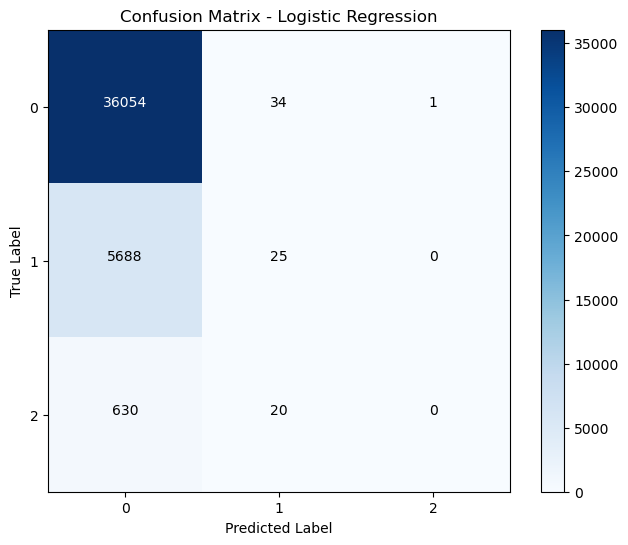

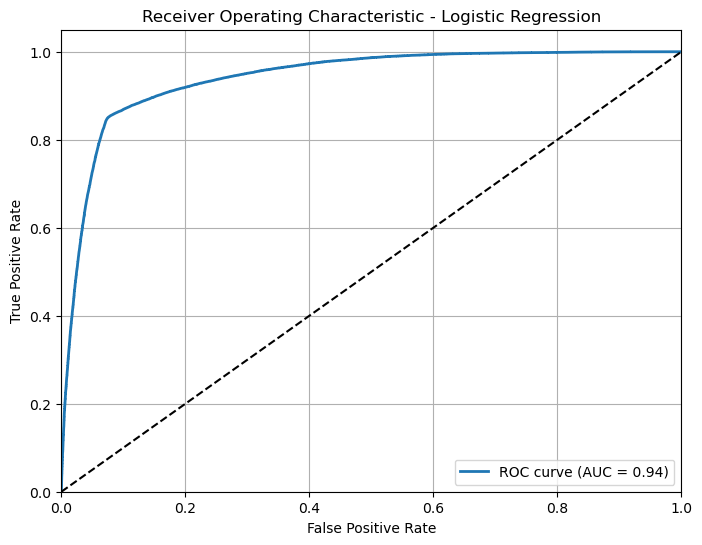

Accuracy: 0.849877508715726
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10.0}


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Replace 'target_variable' with the name of your target column

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the parameter grid for random search
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Step 5: Perform random search grid CV
lr = LogisticRegression()
random_search = RandomizedSearchCV(lr, param_distributions=param_grid, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

# Step 6: Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Step 7: Make predictions on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

# Step 8: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 9: Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 10: Binarize the target variable for ROC curve
y_bin = label_binarize(y_test, classes=np.unique(y))

# Step 11: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_bin.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

# Step 12: Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add the actual numbers inside the confusion matrix
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.show()

# Step 13: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc), lw=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 14: Print the accuracy
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)


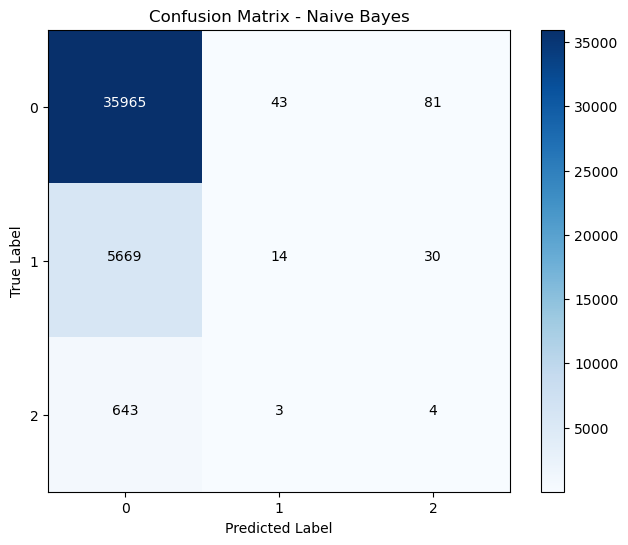

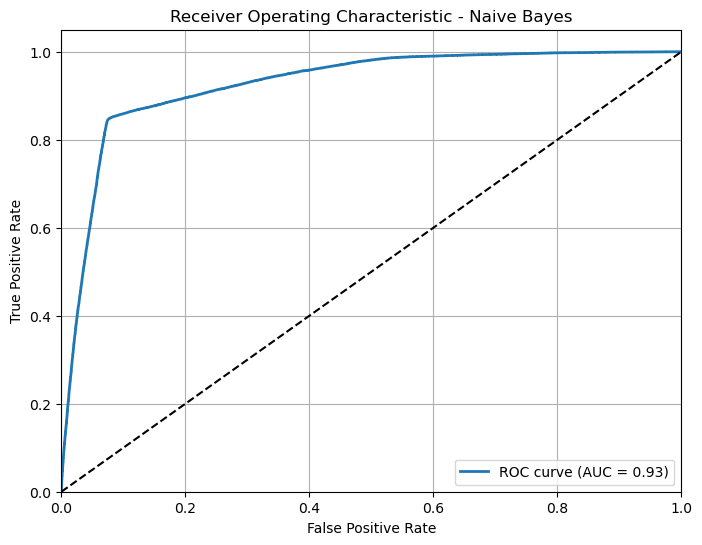

Accuracy: 0.8476161311598982
Best Parameters: {'var_smoothing': 1e-06}


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the parameter grid for random search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
}

# Step 5: Perform random search grid CV
nb = GaussianNB()
random_search = RandomizedSearchCV(nb, param_distributions=param_grid, n_iter=4, cv=5)
random_search.fit(X_train, y_train)

# Step 6: Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Step 7: Make predictions on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

# Step 8: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 9: Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 10: Binarize the target variable for ROC curve
y_bin = label_binarize(y_test, classes=np.unique(y))

# Step 11: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_bin.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

# Step 12: Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add the actual numbers inside the confusion matrix
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.show()

# Step 13: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc), lw=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 14: Print the accuracy
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)

In [ ]:
##Knn K fold

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

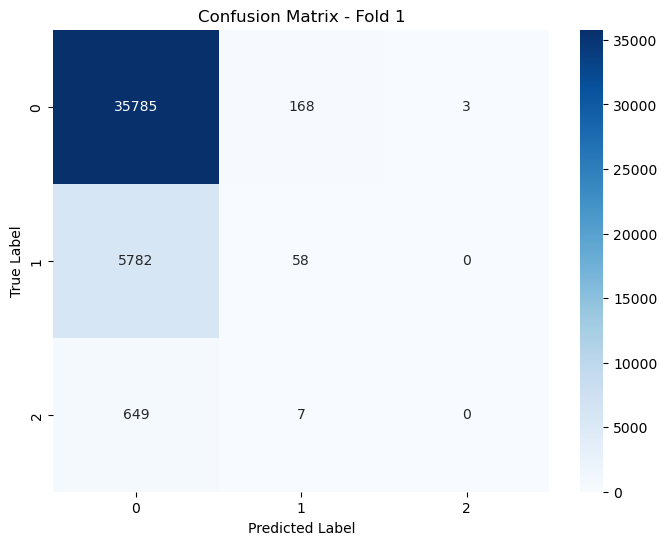

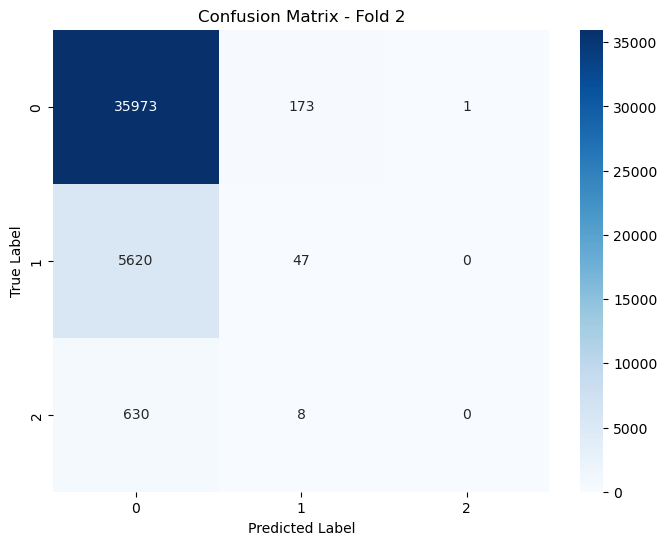

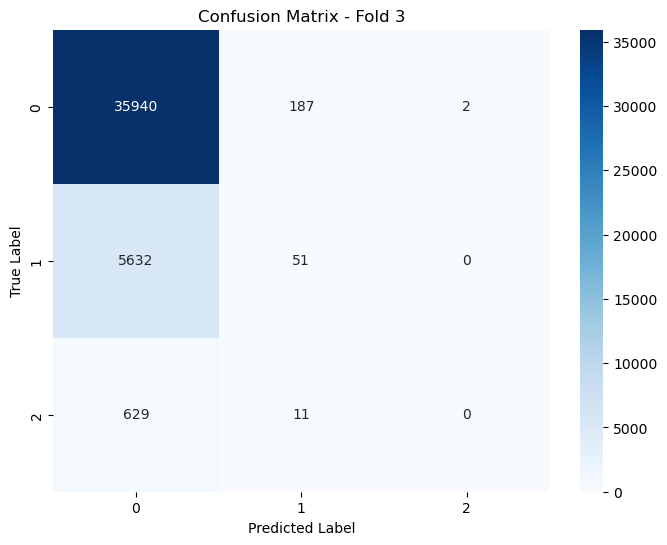

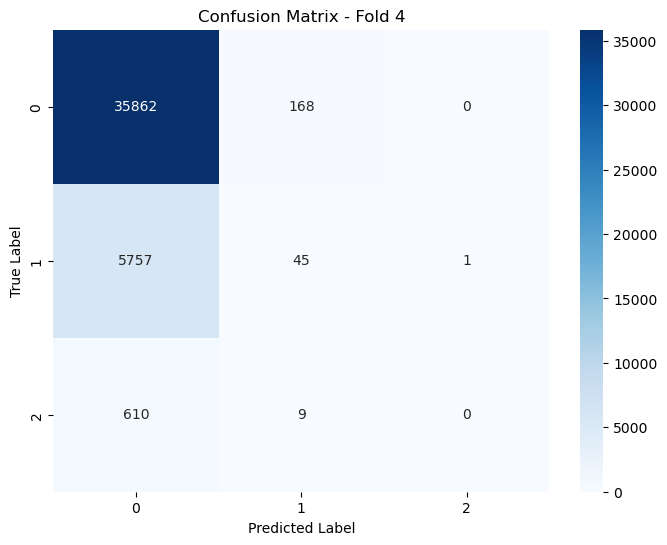

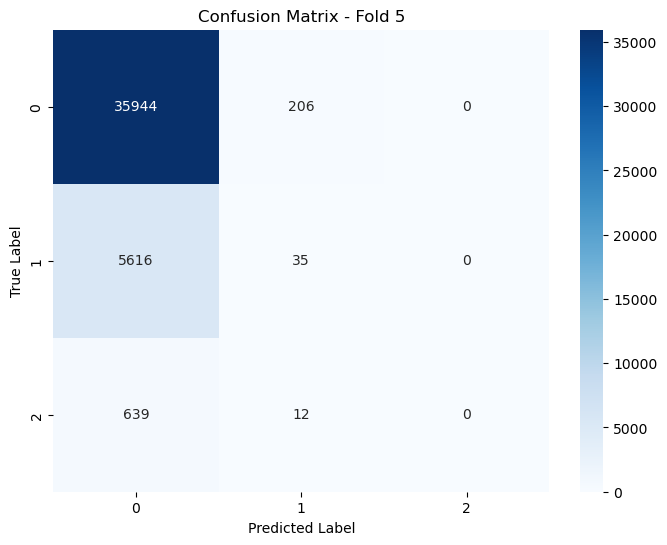

Mean Accuracy: 0.8467916705926694
Standard Deviation of Accuracy: 0.0015156607879153502


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']

# Step 3: Define the number of folds
n_splits = 5

# Step 4: Initialize the KNN classifier with the specified parameters
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform', algorithm='brute', p=1)

# Step 5: Perform k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)

accuracy_scores = []
confusion_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the KNN model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)



# Step 8: Plot the confusion matrix for each fold
for i, cm in enumerate(confusion_matrices):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Fold {}'.format(i+1))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

In [15]:
## Neural Network Kfold

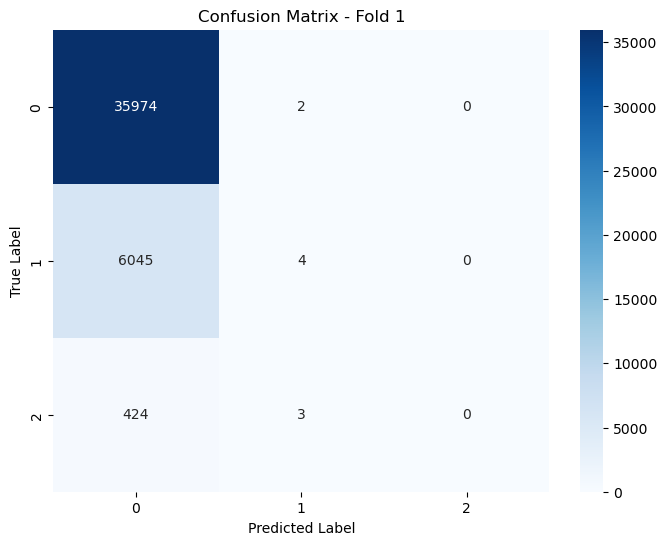

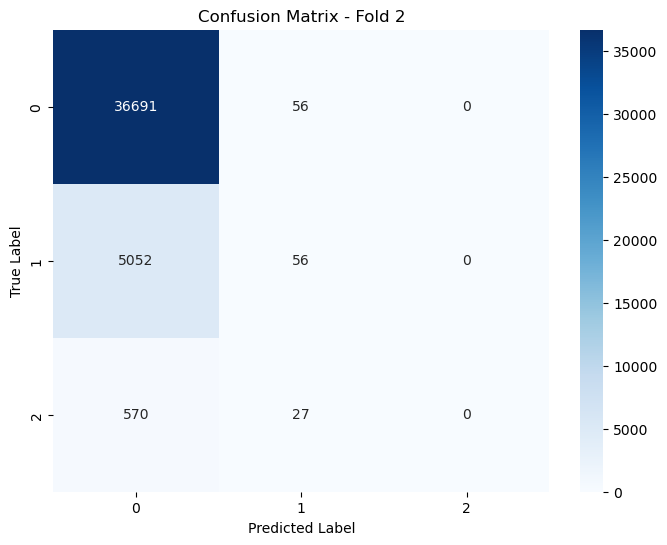

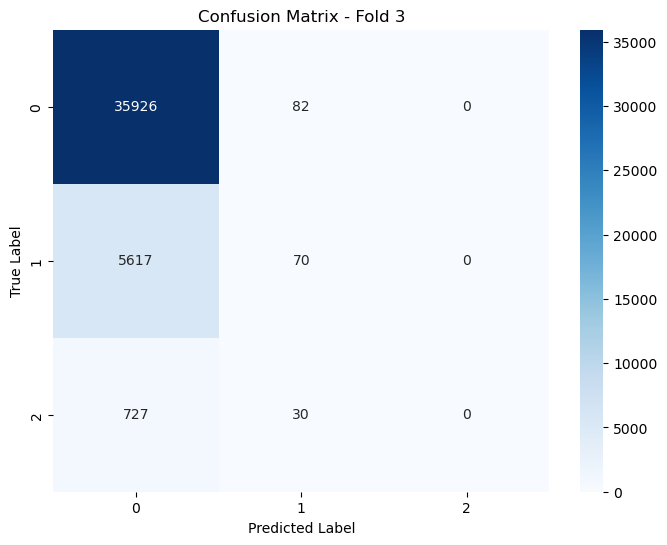

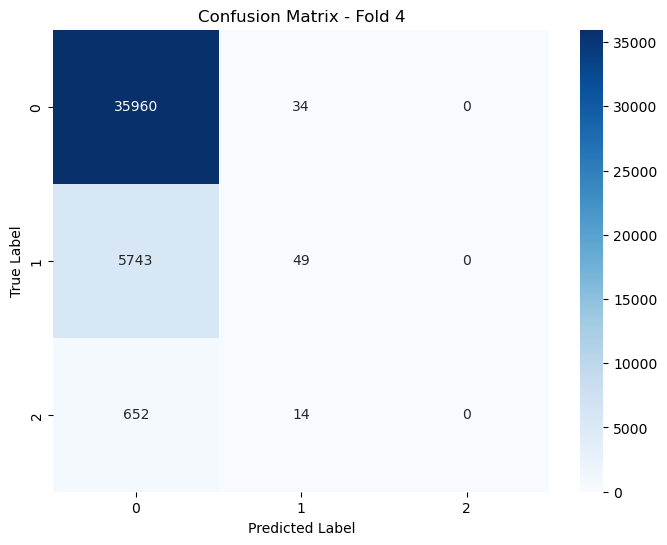

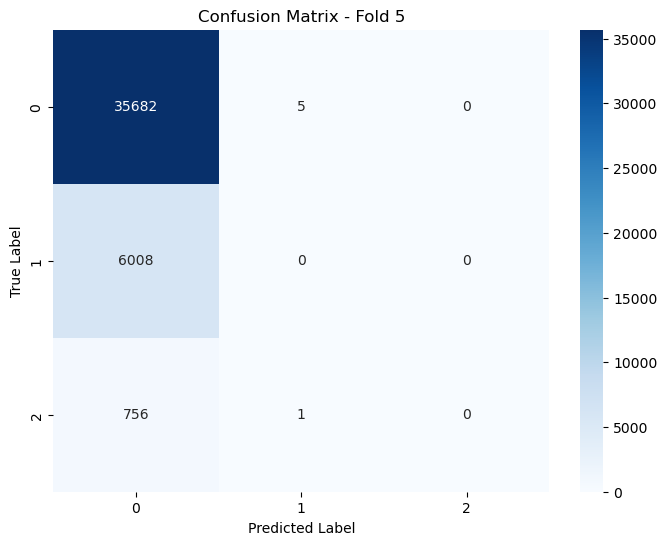

Mean Accuracy: 0.8499575991708281
Standard Deviation of Accuracy: 0.0083334060970533


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
dataset = pd.read_csv("/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Specify the target column

# Step 3: Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Define the MLPClassifier with the best parameters
best_params = {
    'solver': 'adam',
    'max_iter': 1000,
    'learning_rate': 'constant',
    'hidden_layer_sizes': (10,),
    'alpha': 0.01,
    'activation': 'logistic'
}
mlp = MLPClassifier(random_state=42, **best_params)

# Step 5: Perform k-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits)
accuracy_scores = []
confusion_matrices = []

for train_index, test_index in kf.split(X_scaled):
    # Split the data into training and test sets for this fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training fold
    mlp.fit(X_train, y_train)
    
    # Make predictions on the test fold
    y_pred = mlp.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Step 6: Calculate the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Step 7: Print the mean and standard deviation of accuracy scores

#print("Standard Deviation of Accuracy:", std_accuracy)

# Step 8: Plot the confusion matrices for each fold
for i, cm in enumerate(confusion_matrices):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Fold {}'.format(i+1))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
# Step 6: Calculate the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Step 7: Print the mean and standard deviation of accuracy scores
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

In [17]:
##Logistic Regression Kfold

Fold 1


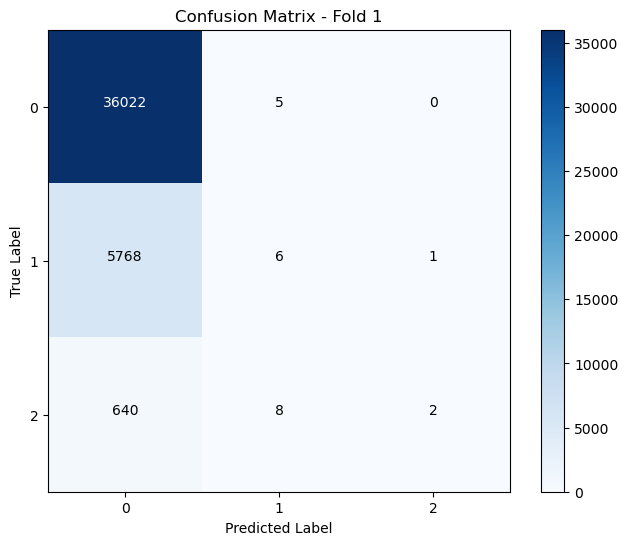

Fold 2


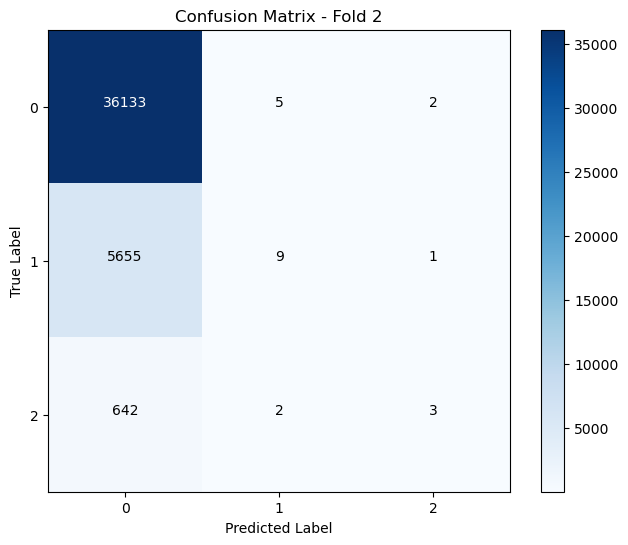

Fold 3


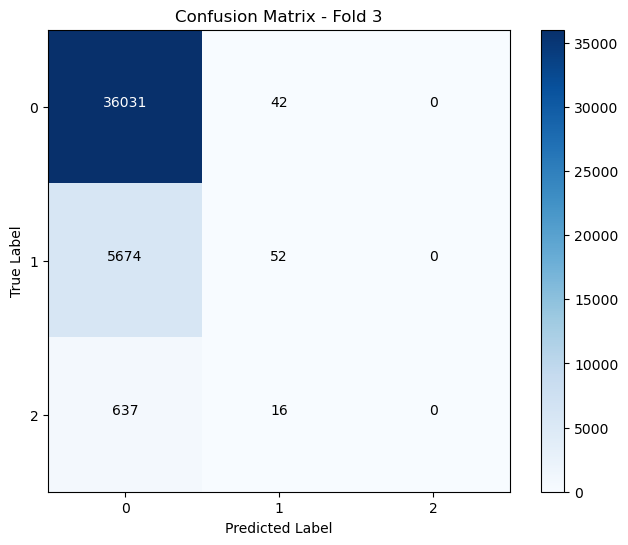

Fold 4


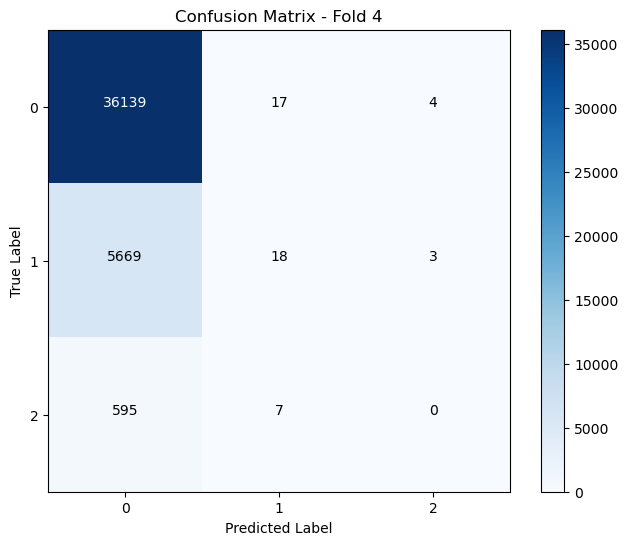

Fold 5


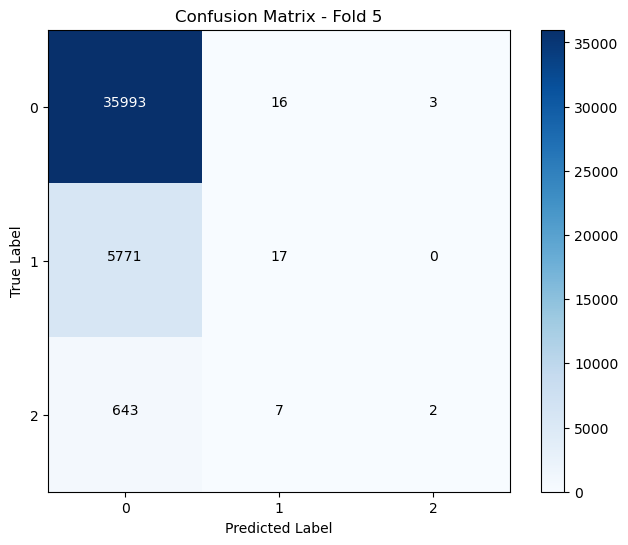

Mean Accuracy: 0.8500282672194478
Standard Deviation of Accuracy: 0.0013792324083271275


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Replace 'target_variable' with the name of your target column

# Step 3: Define the model with the best parameters
best_params = {
    'C': 10.0,
    'penalty': 'l2',
    'solver': 'liblinear'
}
lr = LogisticRegression(**best_params)

# Step 4: Initialize lists for accuracy scores and confusion matrices
accuracy_scores = []
confusion_matrices = []

# Step 5: Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
fold = 1  # Initialize fold counter
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    lr.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = lr.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the fold number
    print("Fold", fold)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y)))
    plt.xticks(tick_marks, np.unique(y))
    plt.yticks(tick_marks, np.unique(y))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Add the actual numbers inside the confusion matrix
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.show()
    
    # Append accuracy and confusion matrix to lists
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)
    
    # Increment the fold counter
    fold += 1

# Step 6: Calculate the average accuracy and confusion matrix
average_accuracy = np.mean(accuracy_scores)
average_cm = np.mean(confusion_matrices, axis=0)

# Print the average accuracy and confusion matrix
# Step 6: Calculate the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Step 7: Print the mean and standard deviation of accuracy scores
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


In [19]:
##Naive Bayes Kfold

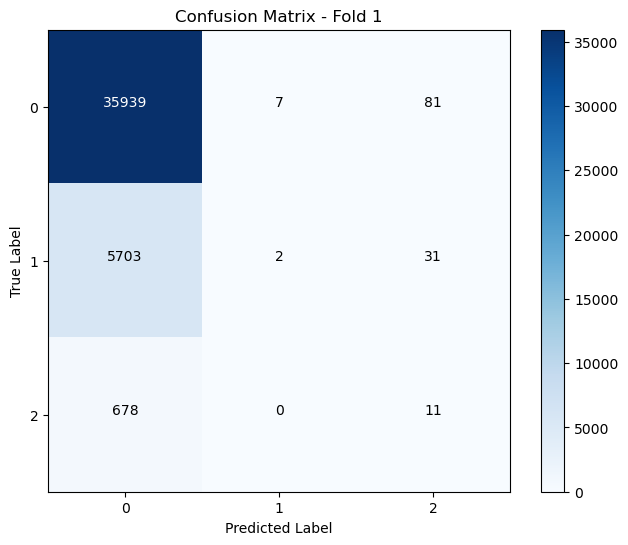

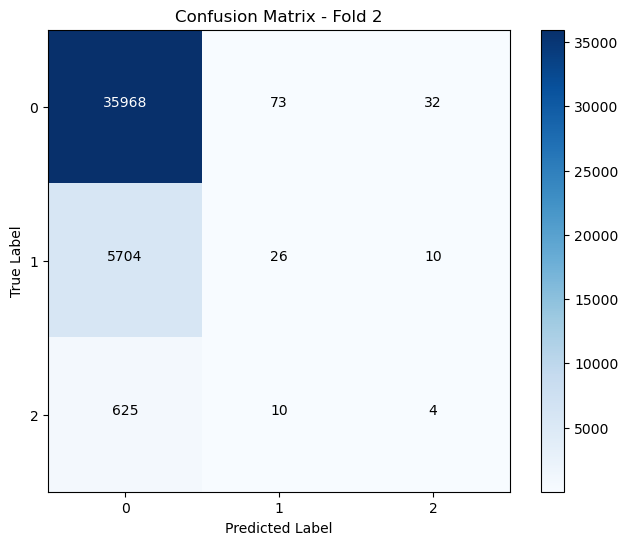

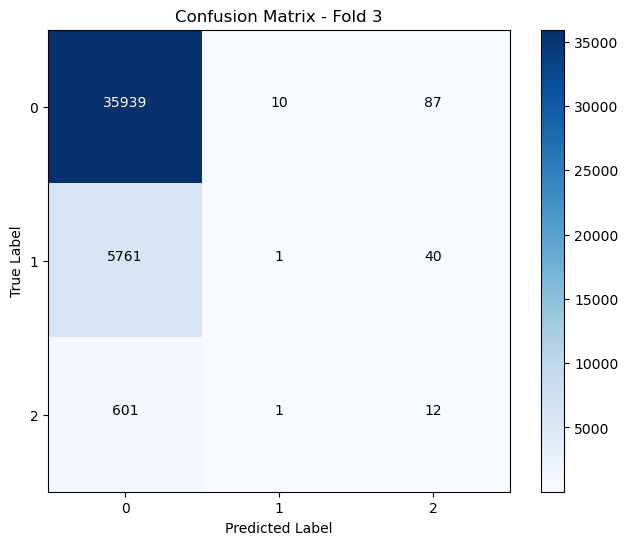

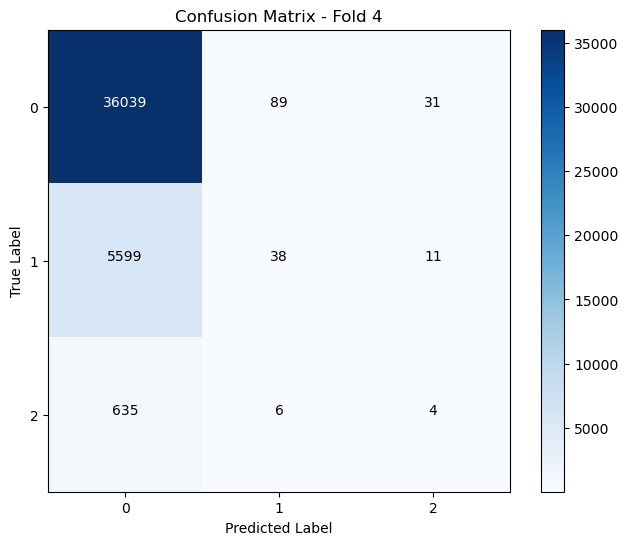

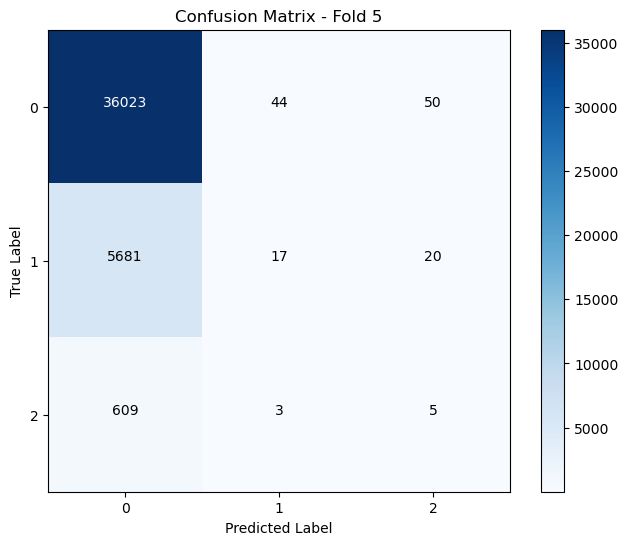

Mean Accuracy: 0.8481484971261659
Standard Deviation of Accuracy: 0.0012030276798857154


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']

# Step 3: Initialize lists for accuracy scores and confusion matrices
accuracy_scores = []
confusion_matrices = []

# Step 4: Perform K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    nb = GaussianNB(var_smoothing=1e-06)
    nb.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = nb.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y)))
    plt.xticks(tick_marks, np.unique(y))
    plt.yticks(tick_marks, np.unique(y))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add the actual numbers inside the confusion matrix
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.show()

    fold += 1

# Step 5: Calculate the average accuracy
# Step 6: Calculate the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Step 7: Print the mean and standard deviation of accuracy scores
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


In [ ]:
##Stratified KNN

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 1


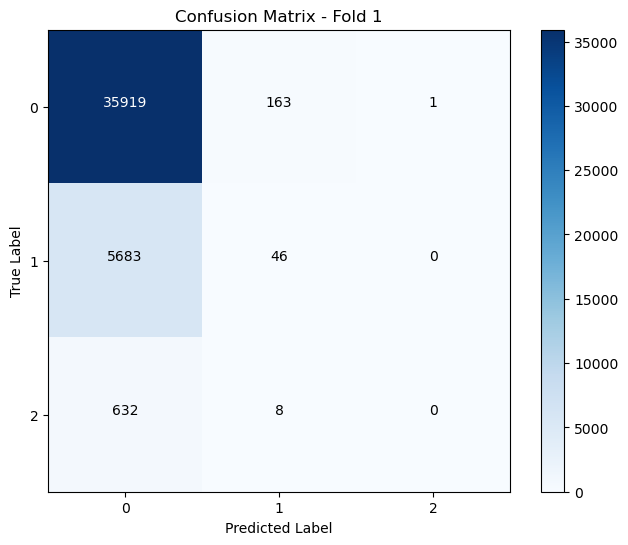

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 2


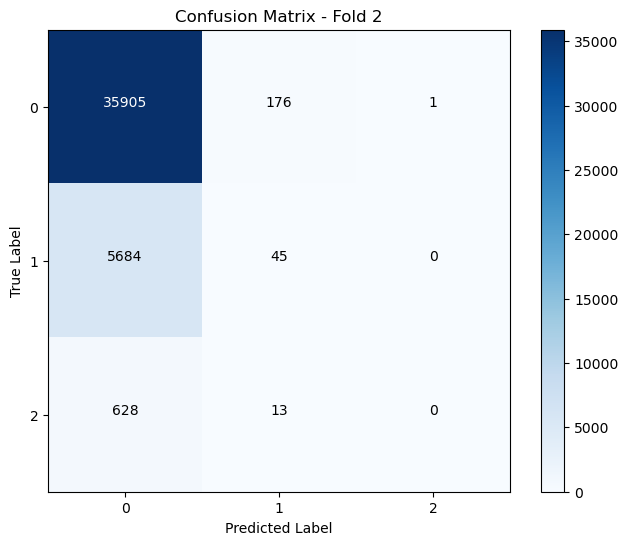

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 3


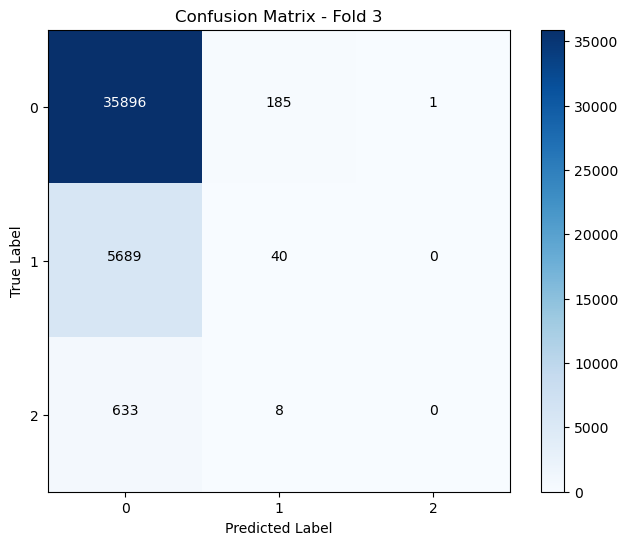

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 4


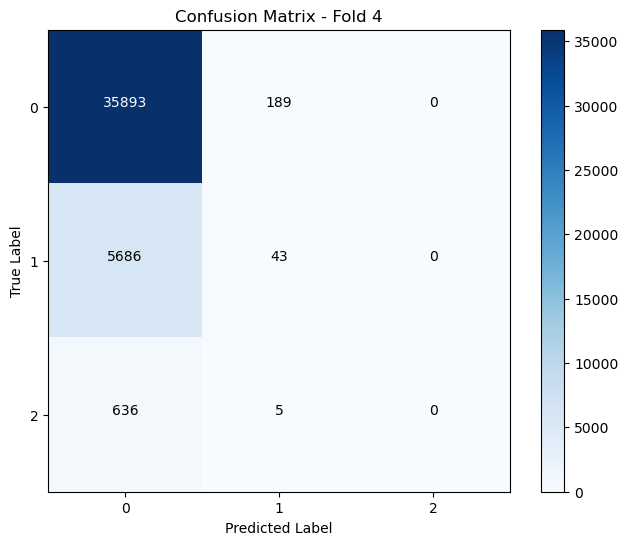

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 5


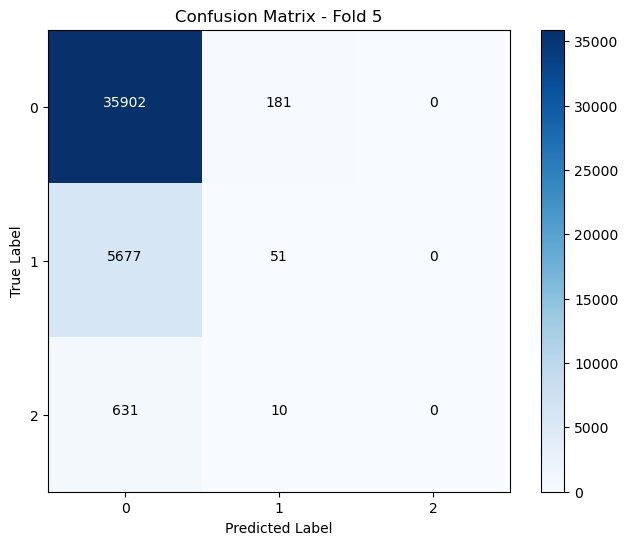

Average Accuracy: 0.8467916705926694


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Replace 'target_variable' with the name of your target column

# Step 3: Define the model with the best parameters
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform', algorithm='brute', p=1)

# Step 4: Initialize lists for accuracy scores and confusion matrices
accuracy_scores = []
confusion_matrices = []

# Step 5: Perform stratified sampling
skf = StratifiedKFold(n_splits=5, shuffle=True)
fold = 1  # Initialize fold counter
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the fold number
    print("Fold", fold)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y)))
    plt.xticks(tick_marks, np.unique(y))
    plt.yticks(tick_marks, np.unique(y))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Add the actual numbers inside the confusion matrix
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.show()
    
    # Append accuracy and confusion matrix to lists
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)
    
    # Increment the fold counter
    fold += 1

# Step 6: Calculate the average accuracy and confusion matrix
average_accuracy = np.mean(accuracy_scores)
average_cm = np.mean(confusion_matrices, axis=0)

# Print the average accuracy and confusion matrix
print("Average Accuracy:", average_accuracy)


In [22]:
##stratified Neural Network

Fold 1


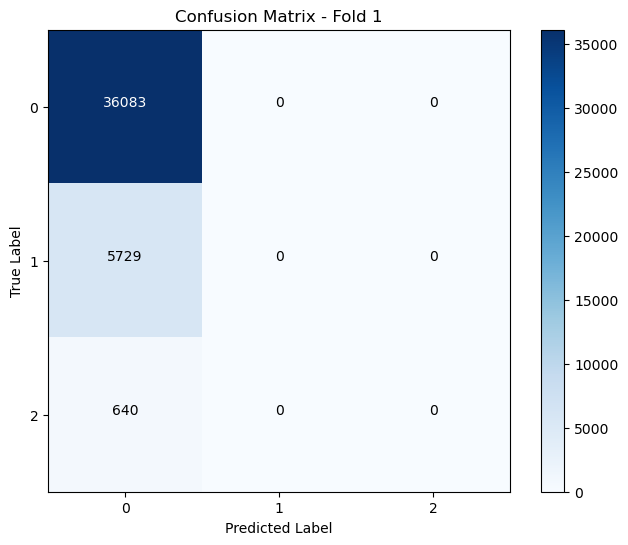

Fold 2


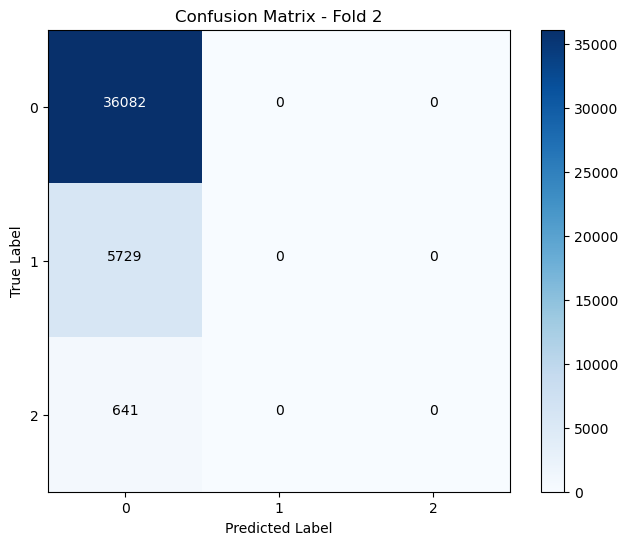

Fold 3


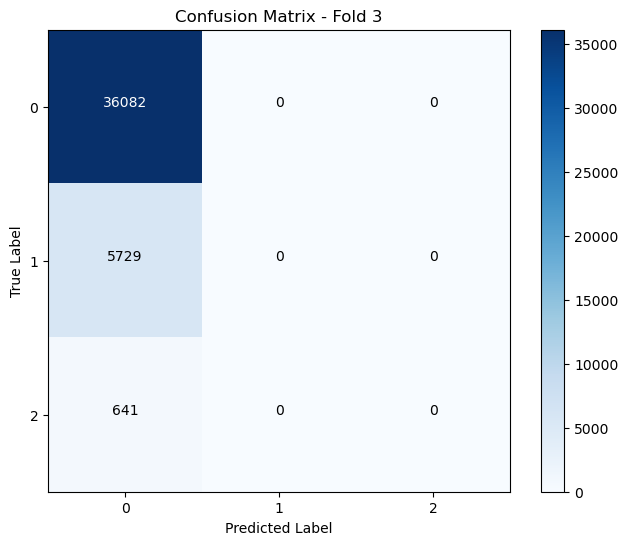

Fold 4


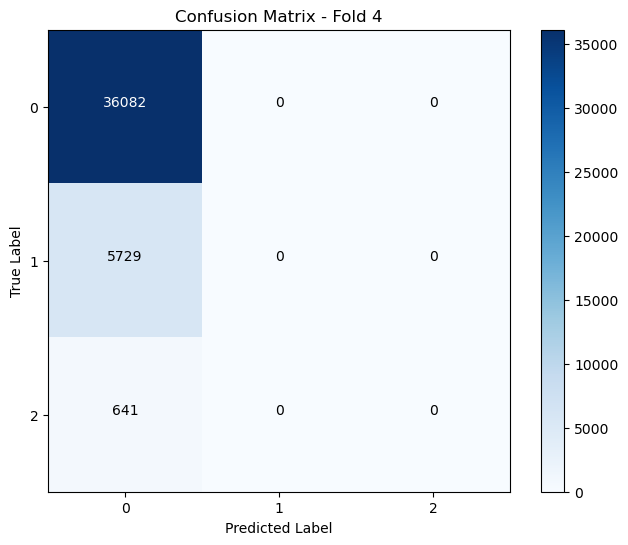

Fold 5


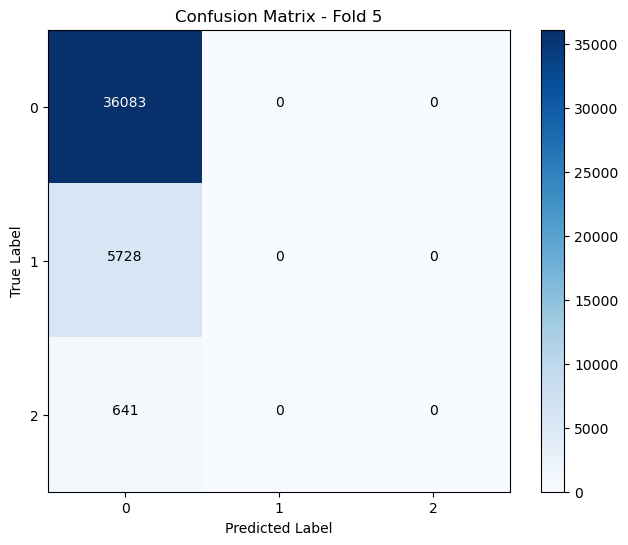

Average Accuracy: 0.8499575991708281


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Replace 'target_variable' with the name of your target column

# Step 3: Define the model with the best parameters
best_params = {
    'solver': 'adam',
    'max_iter': 1000,
    'learning_rate': 'constant',
    'hidden_layer_sizes': (10,),
    'alpha': 0.01,
    'activation': 'logistic'
}
mlp = MLPClassifier(**best_params)

# Step 4: Initialize lists for accuracy scores and confusion matrices
accuracy_scores = []
confusion_matrices = []

# Step 5: Perform stratified sampling
skf = StratifiedKFold(n_splits=5, shuffle=True)
fold = 1  # Initialize fold counter
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    mlp.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = mlp.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the fold number
    print("Fold", fold)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y)))
    plt.xticks(tick_marks, np.unique(y))
    plt.yticks(tick_marks, np.unique(y))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Add the actual numbers inside the confusion matrix
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.show()
    
    # Append accuracy and confusion matrix to lists
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)
    
    # Increment the fold counter
    fold += 1

# Step 6: Calculate the average accuracy and confusion matrix
average_accuracy = np.mean(accuracy_scores)
average_cm = np.mean(confusion_matrices, axis=0)

# Print the average accuracy and confusion matrix
print("Average Accuracy:", average_accuracy)


In [24]:
##Stratified Logistic Regression

Fold 1


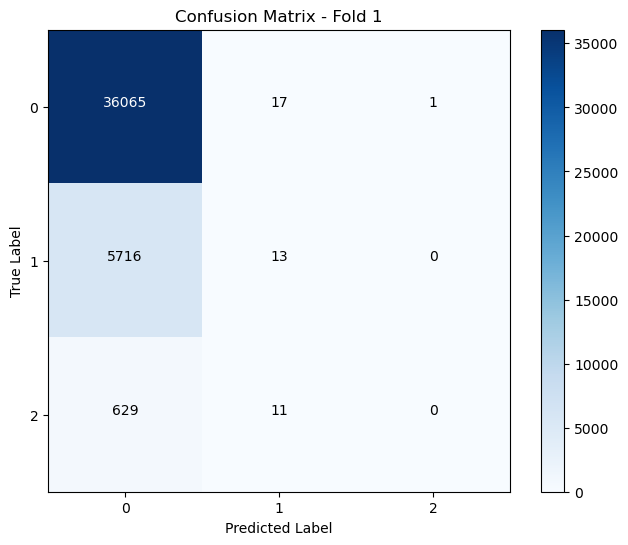

Fold 2


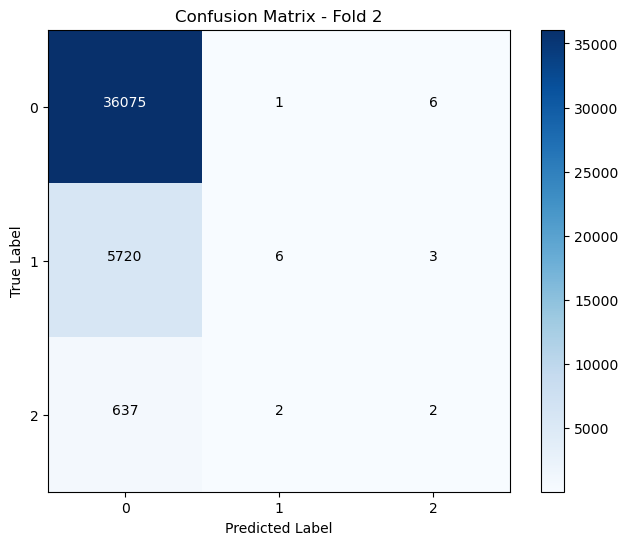

Fold 3


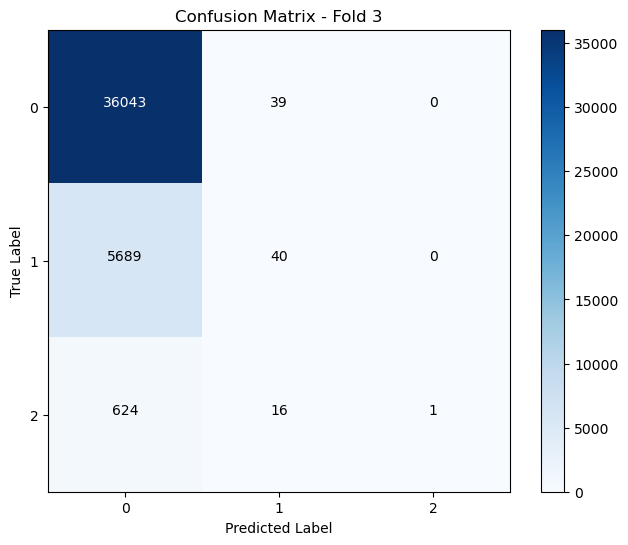

Fold 4


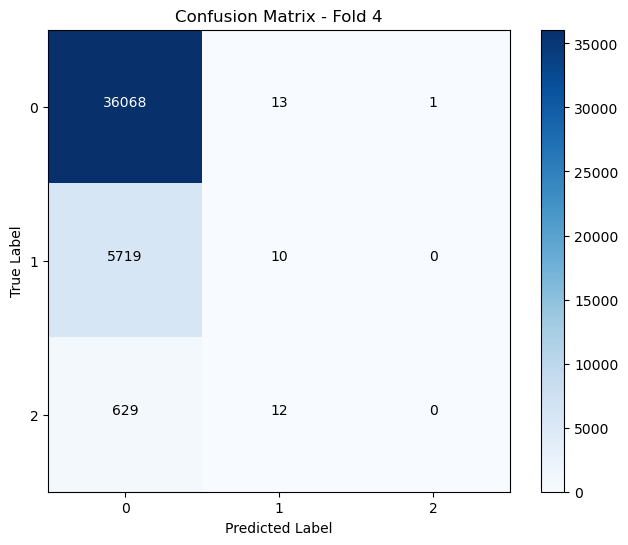

Fold 5


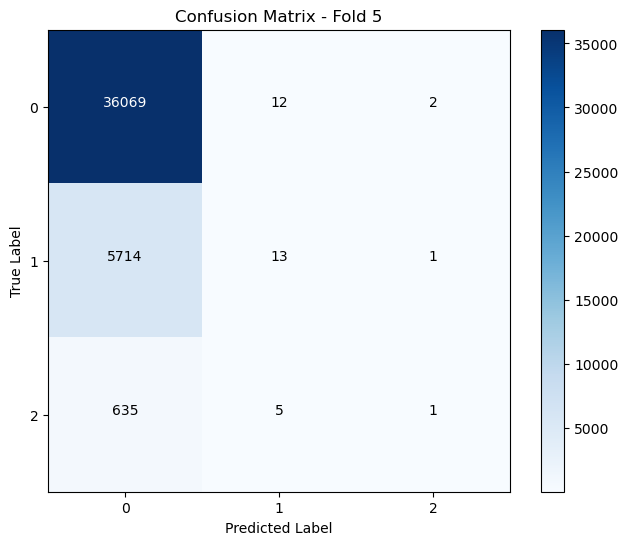

Average Accuracy: 0.8499293319513803


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Replace 'target_variable' with the name of your target column

# Step 3: Define the model with the best parameters
best_params = {
    'C': 10.0,
    'penalty': 'l2',
    'solver': 'liblinear'
}
lr = LogisticRegression(**best_params)

# Step 4: Initialize lists for accuracy scores and confusion matrices
accuracy_scores = []
confusion_matrices = []

# Step 5: Perform stratified sampling
skf = StratifiedKFold(n_splits=5, shuffle=True)
fold = 1  # Initialize fold counter
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    lr.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = lr.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the fold number
    print("Fold", fold)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y)))
    plt.xticks(tick_marks, np.unique(y))
    plt.yticks(tick_marks, np.unique(y))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Add the actual numbers inside the confusion matrix
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.show()
    
    # Append accuracy and confusion matrix to lists
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)
    
    # Increment the fold counter
    fold += 1

# Step 6: Calculate the average accuracy and confusion matrix
average_accuracy = np.mean(accuracy_scores)
average_cm = np.mean(confusion_matrices, axis=0)

# Print the average accuracy and confusion matrix
print("Average Accuracy:", average_accuracy)


In [26]:
##Stratified Naive Bayes

Fold 1


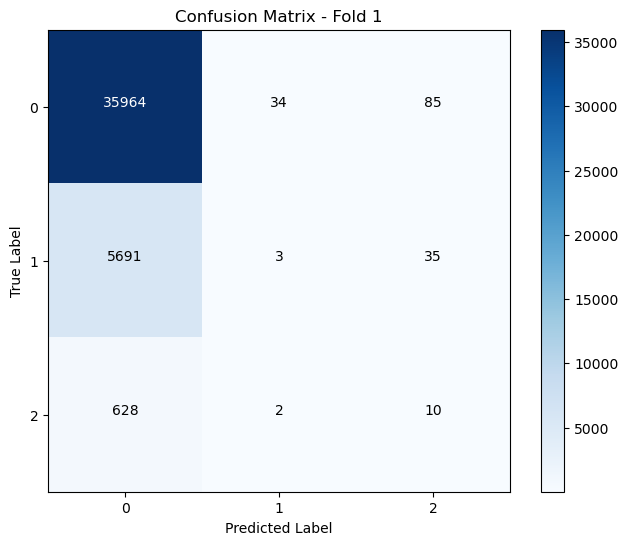

Fold 2


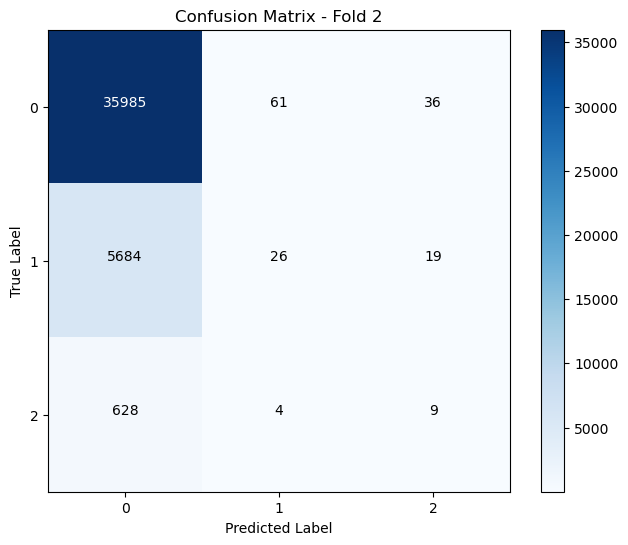

Fold 3


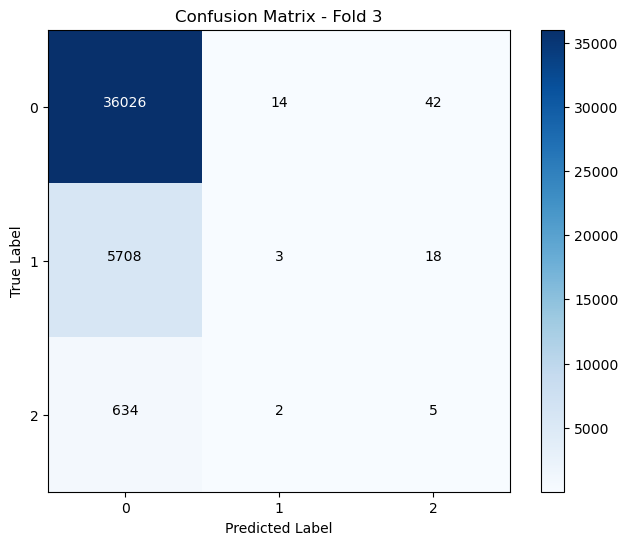

Fold 4


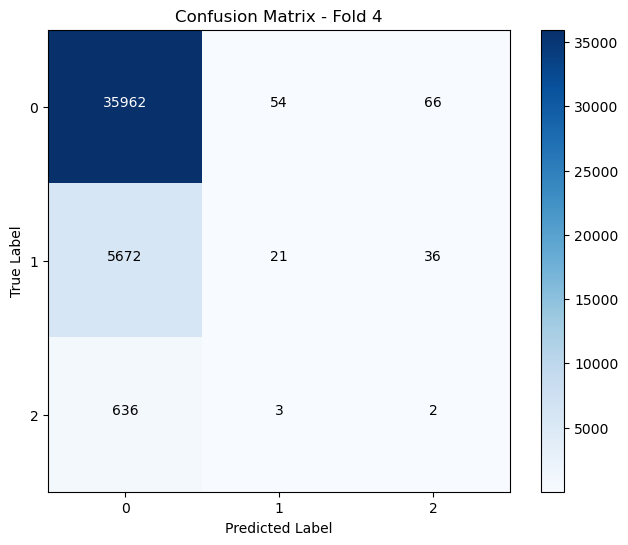

Fold 5


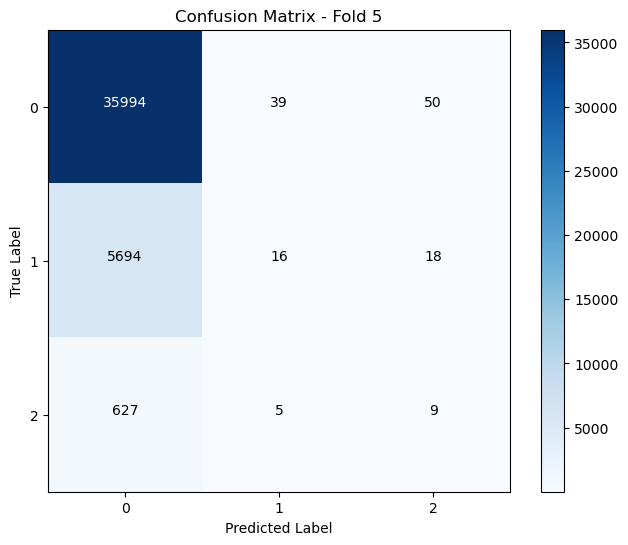

Average Accuracy: 0.8481814755488551


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Replace 'target_variable' with the name of your target column

# Step 3: Define the model with the best parameters
nb = GaussianNB(var_smoothing=1e-06)

# Step 4: Initialize lists for accuracy scores and confusion matrices
accuracy_scores = []
confusion_matrices = []

# Step 5: Perform stratified sampling
skf = StratifiedKFold(n_splits=5, shuffle=True)
fold = 1  # Initialize fold counter
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    nb.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = nb.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the fold number
    print("Fold", fold)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y)))
    plt.xticks(tick_marks, np.unique(y))
    plt.yticks(tick_marks, np.unique(y))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Add the actual numbers inside the confusion matrix
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.show()
    
    # Append accuracy and confusion matrix to lists
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)
    
    # Increment the fold counter
    fold += 1

# Step 6: Calculate the average accuracy and confusion matrix
average_accuracy = np.mean(accuracy_scores)
average_cm = np.mean(confusion_matrices, axis=0)

# Print the average accuracy and confusion matrix
print("Average Accuracy:", average_accuracy)


In [ ]:
##KNN Regularization

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


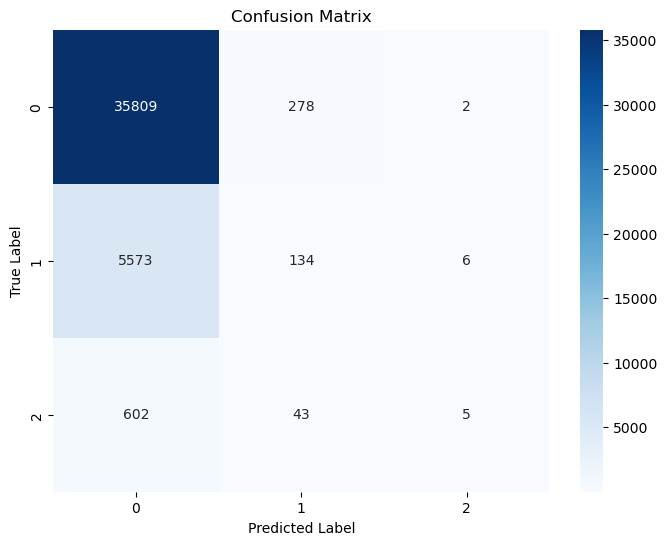

Accuracy: 0.8467916705926694


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Replace with your target column

# Step 3: Perform L1 regularization for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)

# Select features with non-zero coefficients
selected_features = np.where(lasso.coef_ != 0)[0]
X_selected = X_scaled[:, selected_features]

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 5: Define the KNN model with the specified parameters
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform', algorithm='brute', p=1)

# Step 6: Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = knn.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Accuracy:", accuracy)


In [33]:
##Neural network Regularization

Accuracy: 0.8499481767643456


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

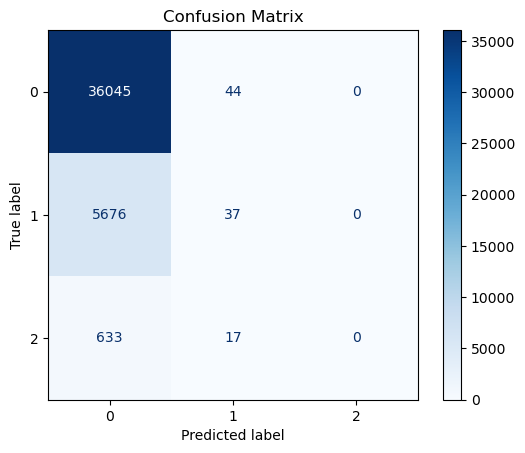

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Replace 'target_variable' with the name of your target column

# Step 3: Perform L1 regularization for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)

# Select features with non-zero coefficients
selected_features = np.where(lasso.coef_ != 0)[0]
X_selected = X_scaled[:, selected_features]

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 5: Define the model with the best parameters
best_params = {
    'solver': 'adam',
    'max_iter': 1000,
    'learning_rate': 'constant',
    'hidden_layer_sizes': (10,),
    'alpha': 0.01,
    'activation': 'logistic'
}
mlp = MLPClassifier(**best_params)

# Step 6: Fit the model on the training data
mlp.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = mlp.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

# Plot the confusion matrix
labels = np.unique(y)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(mlp, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [35]:
##Logistic regression Regularization

Accuracy: 0.8499717327805522


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

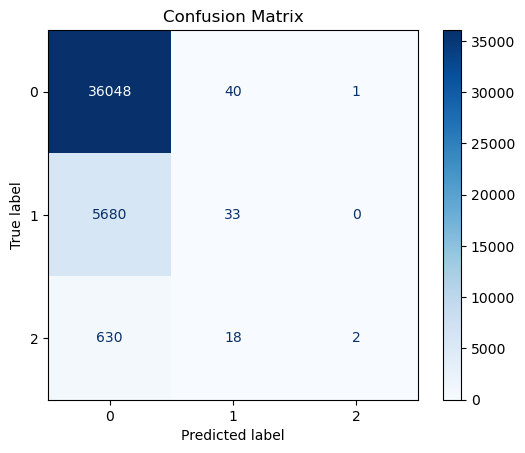

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset = pd.read_csv("C:/Users/mado1/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Replace 'target_variable' with the name of your target column

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the model with regularization
reg_param = 0.01  # Regularization parameter (adjust as needed)
lr = LogisticRegression(penalty='l2', C=1/reg_param)

# Step 6: Fit the model on the training data
lr.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test data
y_pred = lr.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

# Plot the confusion matrix
labels = np.unique(y)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(lr, X_test_scaled, y_test, display_labels=labels, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
